## We are going to use a Cardiotocographic data.
## There are 2126 measurements and classifications of foetal heart rate (FHR) signals. Our response variable of label here is 'NSP' with three categories: Normal=1; Suspect=2; Pathologic=3.

## Import the required packages.

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns  
import matplotlib as plt 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import sklearn.metrics as sklm
!pip install tensorflow
!pip install keras 

%matplotlib inline

  Stored in directory: C:\Users\Amit Ghosh.SFH-315-0605\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\Amit Ghosh.SFH-315-0605\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\Amit Ghosh.SFH-315-0605\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built gast absl-py termcolor
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0


## Import the CTG dataset.

In [16]:
data = pd.read_csv('CTG.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns))

(2126, 22)
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'NSP']


## Looking at the structure of the data.

In [17]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


## To summarize the data. 

In [18]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## We show the pairwise correlations among all variables.

In [19]:
data.corr(method='pearson', min_periods=1)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
LB,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
AC,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
FM,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
UC,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
DL,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
DS,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
DP,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
ASTV,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
MSTV,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
ALTV,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [41]:
X= data.iloc[:,:21]
y = data['NSP'] -1

In [42]:
X

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
0,120,0.000,0.000,0.000,0.000,0.0,0.000,73,0.5,43,...,64,62,126,2,0,120,137,121,73,1
1,132,0.006,0.000,0.006,0.003,0.0,0.000,17,2.1,0,...,130,68,198,6,1,141,136,140,12,0
2,133,0.003,0.000,0.008,0.003,0.0,0.000,16,2.1,0,...,130,68,198,5,1,141,135,138,13,0
3,134,0.003,0.000,0.008,0.003,0.0,0.000,16,2.4,0,...,117,53,170,11,0,137,134,137,13,1
4,132,0.007,0.000,0.008,0.000,0.0,0.000,16,2.4,0,...,117,53,170,9,0,137,136,138,11,1
5,134,0.001,0.000,0.010,0.009,0.0,0.002,26,5.9,0,...,150,50,200,5,3,76,107,107,170,0
6,134,0.001,0.000,0.013,0.008,0.0,0.003,29,6.3,0,...,150,50,200,6,3,71,107,106,215,0
7,122,0.000,0.000,0.000,0.000,0.0,0.000,83,0.5,6,...,68,62,130,0,0,122,122,123,3,1
8,122,0.000,0.000,0.002,0.000,0.0,0.000,84,0.5,5,...,68,62,130,0,0,122,122,123,3,1
9,122,0.000,0.000,0.003,0.000,0.0,0.000,86,0.3,6,...,68,62,130,1,0,122,122,123,1,1


In [43]:
y

0       1
1       0
2       0
3       0
4       0
5       2
6       2
7       2
8       2
9       2
10      1
11      1
12      0
13      0
14      0
15      0
16      0
17      1
18      0
19      0
20      2
21      0
22      2
23      2
24      2
25      2
26      2
27      2
28      1
29      0
       ..
2096    0
2097    0
2098    0
2099    0
2100    0
2101    0
2102    0
2103    0
2104    0
2105    0
2106    0
2107    0
2108    0
2109    0
2110    0
2111    0
2112    0
2113    0
2114    0
2115    0
2116    0
2117    0
2118    0
2119    0
2120    0
2121    1
2122    1
2123    1
2124    1
2125    0
Name: NSP, Length: 2126, dtype: int64

## To get a count of the three different foetal heart rate categories. 

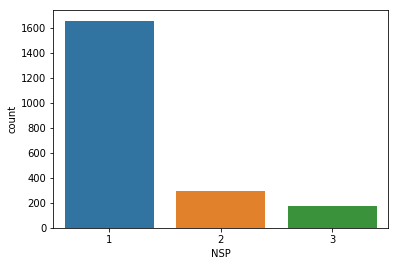

In [44]:
sns.countplot(x = 'NSP', data = data)  

## Partitioning the dataset into train and test datasets.

In [56]:
#Data Partition
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 55) 
yt = y_test

## We do the zscore standardization of the dataset.

In [57]:
#Standardize the dataset by subtracting the mean and dividing bythe standard deviation (i.e. we use the z-score method)
mean = X_train.mean(axis = 0)   #This ensures we calculate mean along the columns
X_train -= mean
s = X_train.std(axis = 0)
X_train /= s

X_test -= mean      #We normalize the test data using the mean and standard deviation of the train data
X_test /= s

In [58]:
import tensorflow as tf
print(tf.__version__) 

1.14.0


## We do one hot encoding with our label.

In [59]:
#One-Hot Encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

## Now we are going to apply deep neural network with our twenty one features and the label. We will use two hidden layers. 

In [60]:
#Deep Network Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

m = Sequential() 
m.add(Dense(units =32, activation = 'relu', input_dim = 21))   #We have 21 independent variables
m.add(Dropout(0.5)) 
m.add(Dense(units = 16, activation = 'relu')) 
m.add(Dropout(0.5)) 
m.add(Dense(units = 3, activation = 'softmax'))               #The outcome variable has three possible outcomes 

## Compute and fit the model.

In [61]:
#Compile the model
m.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [62]:
#Fit Model
!pip install livelossplot

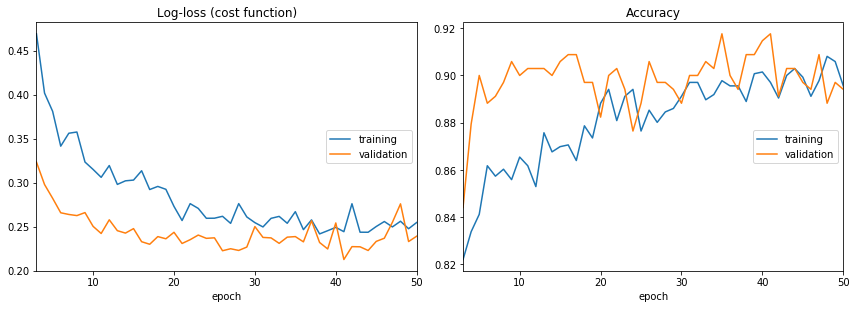

Log-loss (cost function):
training   (min:    0.242, max:    0.952, cur:    0.255)
validation (min:    0.213, max:    0.458, cur:    0.239)

Accuracy:
training   (min:    0.651, max:    0.908, cur:    0.896)
validation (min:    0.806, max:    0.918, cur:    0.894)


In [63]:
#Fit Model
from livelossplot.keras import PlotLossesCallback as p
m.fit(X_train, y_train, batch_size = 1, epochs = 50, validation_split = 0.20, callbacks = [p()]) 

## Make predictions.

In [64]:
#Prediction
y_pred = m.predict_classes(X_test) 
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 1,

In [65]:
m.evaluate(X_test, y_test) 

426/426 [==============================] - 0s 26us/step


[0.3592266789047231, 0.8967136150234741]

## Creating the confusion matrix. 

In [67]:

pd.crosstab(y_pred, yt, rownames = ['Predicted'], colnames = ['Actual'], margins = True, margins_name = 'Total') 

Actual,0,1,2,Total
Predicted,,,,
0,310,14,4,328
1,15,45,9,69
2,1,1,27,29
Total,326,60,40,426
